# Importing all required linraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

# Load Data & Preprocessing

In [2]:
 df=pd.read_excel("CreditWorthiness.xlsx")

In [3]:
df.head()

,Cbal,Cdur,Chist,Cpur,Camt,Sbal,Edur,InRate,MSG,Oparties,...,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign,creditScore
0,0 <= Rs. < 2000,9,all settled till now,Business,13790,Rs. < 1000,1 to 4 years,2,married or widowed male,no one,...,real estate,27,bank,own,1,employee with official position,1,yes,no,good
1,0 <= Rs. < 2000,15,dues not paid earlier,electronics,15250,no savings account,more than 7 years,4,single male,"yes, guarantor",...,real estate,50,none,own,2,employee with official position,1,yes,no,good
2,0 <= Rs. < 2000,36,none taken/all settled,Business,19410,Rs. < 1000,more than 7 years,4,single male,no one,...,Unknown,61,none,free,1,"employed either in management, self or in high...",1,yes,no,bad
3,0 <= Rs. < 2000,48,none taken/all settled,Business,144090,Rs. < 1000,1 to 4 years,2,single male,no one,...,Other cars etc.,25,none,own,1,employee with official position,1,yes,no,bad
4,no checking account,24,all settled till now,electronics,31690,Rs. < 1000,less than 1 year,4,divorced or separated or married female,no one,...,life insurance/building society,26,none,own,1,employee with official position,1,yes,no,good


In [4]:
df.shape

(1000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cbal         1000 non-null   object
 1   Cdur         1000 non-null   int64 
 2   Chist        1000 non-null   object
 3   Cpur         1000 non-null   object
 4   Camt         1000 non-null   int64 
 5   Sbal         1000 non-null   object
 6   Edur         1000 non-null   object
 7   InRate       1000 non-null   int64 
 8   MSG          1000 non-null   object
 9   Oparties     1000 non-null   object
 10  Rdur         1000 non-null   object
 11  Prop         1000 non-null   object
 12  age          1000 non-null   int64 
 13  inPlans      1000 non-null   object
 14  Htype        1000 non-null   object
 15  NumCred      1000 non-null   int64 
 16  JobType      1000 non-null   object
 17  Ndepend      1000 non-null   int64 
 18  telephone    1000 non-null   object
 19  foreign      1000 non-null  

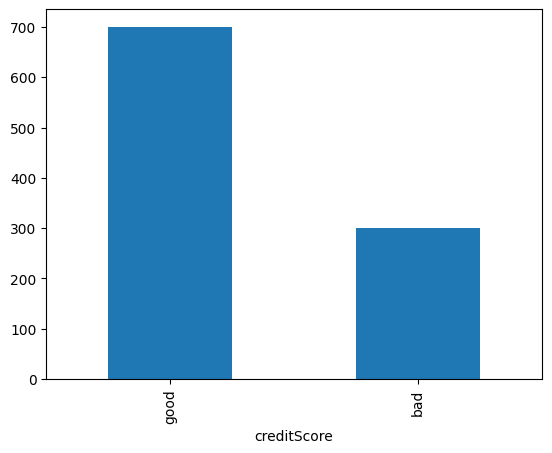

In [6]:
df["creditScore"].value_counts().plot(kind="bar")
plt.show()

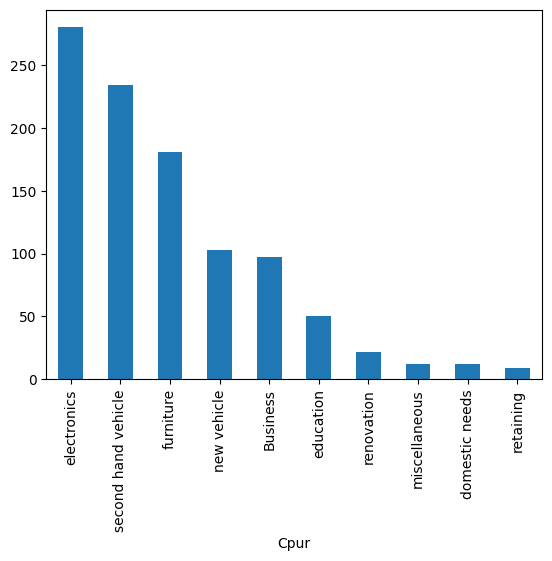

In [34]:
df["Cpur"].value_counts().plot(kind="bar")
plt.show()

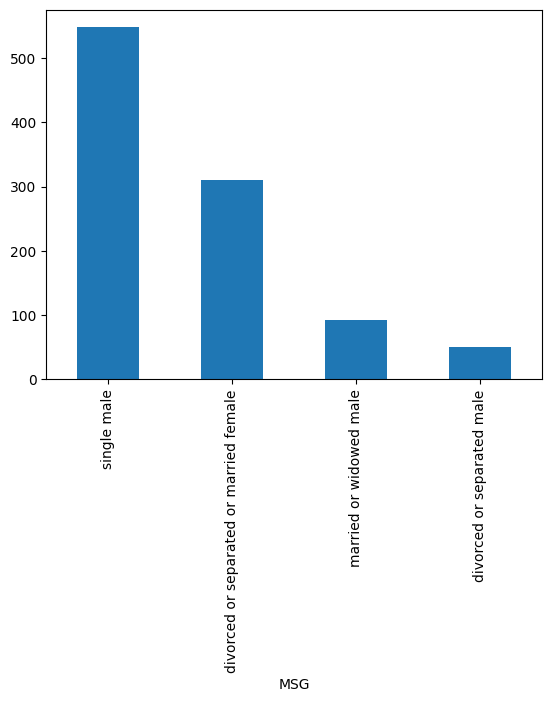

In [35]:
df["MSG"].value_counts().plot(kind="bar")
plt.show()

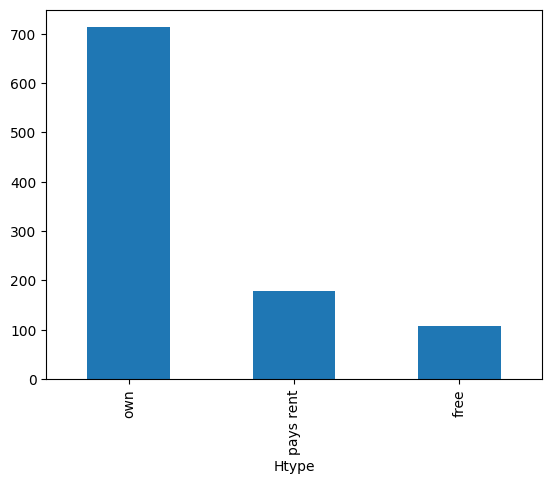

In [36]:
df["Htype"].value_counts().plot(kind="bar")
plt.show()

# Split input & Output

In [7]:
X=df.drop("creditScore",axis=1)
y=df["creditScore"]

In [30]:
encoder=LabelEncoder()
scaler=StandardScaler()

# lable & One_Hot Ecodding

In [10]:
y=encoder.fit_transform(y)

In [11]:
X = pd.get_dummies(df, drop_first=True)

In [12]:
X=X.astype(int)

In [13]:
X.head()

,Cdur,Camt,InRate,age,NumCred,Ndepend,Cbal_0 <= Rs. < 2000,Cbal_Rs. >=2000,Cbal_no checking account,Chist_all settled till now,...,inPlans_none,inPlans_stores,Htype_own,Htype_pays rent,JobType_employee with official position,JobType_non resident either unemployed or unskilled,JobType_resident unskilled,telephone_yes,foreign_yes,creditScore_good
0,9,13790,2,27,1,1,1,0,0,1,...,0,0,1,0,1,0,0,1,0,1
1,15,15250,4,50,2,1,1,0,0,0,...,1,0,1,0,1,0,0,1,0,1
2,36,19410,4,61,1,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,48,144090,2,25,1,1,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0
4,24,31690,4,26,1,1,0,0,1,1,...,1,0,1,0,1,0,0,1,0,1


# Split into traning and testing

In [14]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling Data

In [15]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [16]:
X_train_scaled

array([[-0.76146863, -0.76903058,  0.92512754, ..., -0.82502865,
        -0.19044535, -1.50953255],
       [-1.25895732, -0.83106875, -1.77926477, ..., -0.82502865,
        -0.19044535, -1.50953255],
       [ 0.23350875, -0.70699241,  0.92512754, ..., -0.82502865,
        -0.19044535, -1.50953255],
       ...,
       [-0.26397994, -0.5205274 ,  0.92512754, ..., -0.82502865,
        -0.19044535,  0.66245673],
       [ 0.23350875, -0.10729011, -0.87780067, ..., -0.82502865,
        -0.19044535, -1.50953255],
       [-0.51272428, -0.71505386,  0.92512754, ...,  1.21207912,
        -0.19044535,  0.66245673]], shape=(800, 50))


# Model Creation

In [37]:
model=LogisticRegression()

In [38]:
model.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [41]:
y_pred=model.predict(X_test_scaled)

# Accuracy

In [42]:
accuracy_score(y_test,y_pred)

1.0

In [27]:
print(classification_report(y_test,prd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00       144

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# confusion Matrix

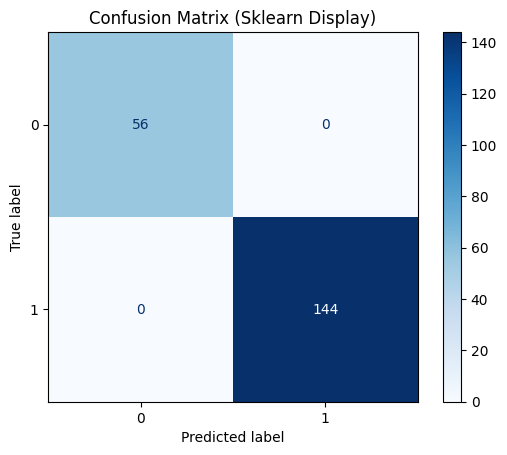

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,prd))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Sklearn Display)')
plt.show()